In [161]:
from xgboost import XGBRegressor

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal=sns.color_palette()
plt.style.use("fivethirtyeight")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

In [163]:
df=pd.read_excel("rainfall-and-daily-consumption-data-on-istanbul-dams.xlsx")

In [164]:
df.head()

,Tarih,Ömerli,Darlik,Elmali,Terkos,B.çekmece,Sazlidere,Alibey,Kazandere,Pabuçdere,ıstırancalar,Unnamed: 11,İstanbul günlük tüketim(m³/gün)
0,2011-01-01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,NaN,2096199
1,2011-01-02,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,NaN,2214668
2,2011-01-03,0.00,0.00,0.00,0.42,1.37,0.87,0.2,2.26,1.89,1.39,NaN,2092441
3,2011-01-04,8.08,10.01,11.64,18.82,9.64,14.72,13.5,8.20,10.37,16.47,NaN,2096199
4,2011-01-05,2.78,8.48,7.09,3.42,0.83,4.31,4.3,1.44,1.60,3.99,NaN,2214668


In [165]:
df=df[["Tarih","İstanbul günlük tüketim(m³/gün)"]]

In [166]:
df.head()

,Tarih,İstanbul günlük tüketim(m³/gün)
0,2011-01-01,2096199
1,2011-01-02,2214668
2,2011-01-03,2092441
3,2011-01-04,2096199
4,2011-01-05,2214668


In [167]:
df=df.set_index("Tarih")

In [168]:
df.index=pd.to_datetime(df.index)

In [169]:
df

,İstanbul günlük tüketim(m³/gün)
Tarih,
2011-01-01,2096199
2011-01-02,2214668
2011-01-03,2092441
2011-01-04,2096199
2011-01-05,2214668
...,...
2023-11-23,3000640
2023-11-24,2981242
2023-11-25,3019121


In [170]:
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'] // 100

In [171]:
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'].astype(float)

In [172]:
df

,İstanbul günlük tüketim(m³/gün)
Tarih,
2011-01-01,20961.0
2011-01-02,22146.0
2011-01-03,20924.0
2011-01-04,20961.0
2011-01-05,22146.0
...,...
2023-11-23,30006.0
2023-11-24,29812.0
2023-11-25,30191.0


In [173]:
import numpy as np
df = np.log(df)

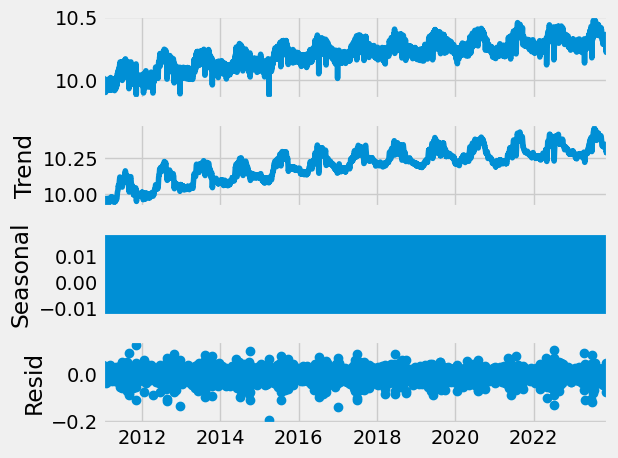

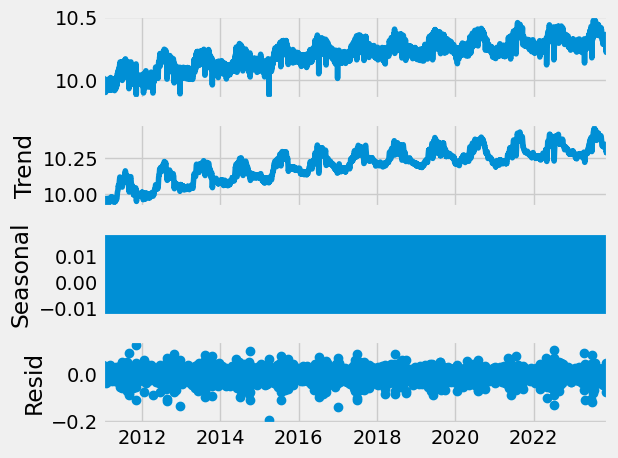

In [174]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df)
result.plot()

In [175]:
df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2023-11-18', '2023-11-19', '2023-11-20', '2023-11-21',
               '2023-11-22', '2023-11-23', '2023-11-24', '2023-11-25',
               '2023-11-26', '2023-11-27'],
              dtype='datetime64[ns]', name='Tarih', length=4714, freq=None)

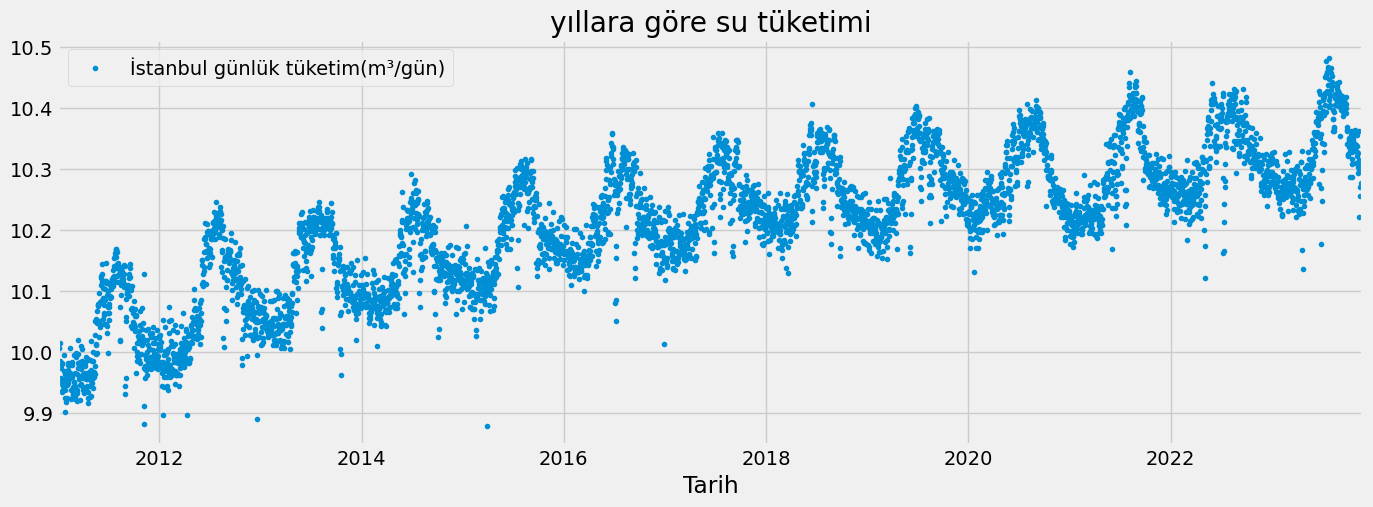

In [176]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='yıllara göre su tüketimi')
plt.show()

In [177]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]

In [178]:
a=len(train)

In [179]:
a

3771

In [180]:
b=len(test)

In [181]:
b

943

In [182]:
len(df)

4714

In [183]:
test_data_oran = (b / len(df)) * 100

In [184]:
test_data_oran

20.004242681374627

In [185]:
train

,İstanbul günlük tüketim(m³/gün)
Tarih,
2011-01-01,9.950419
2011-01-02,10.005412
2011-01-03,9.948652
2011-01-04,9.950419
2011-01-05,10.005412
...,...
2021-04-24,10.212772
2021-04-25,10.195074
2021-04-26,10.234911


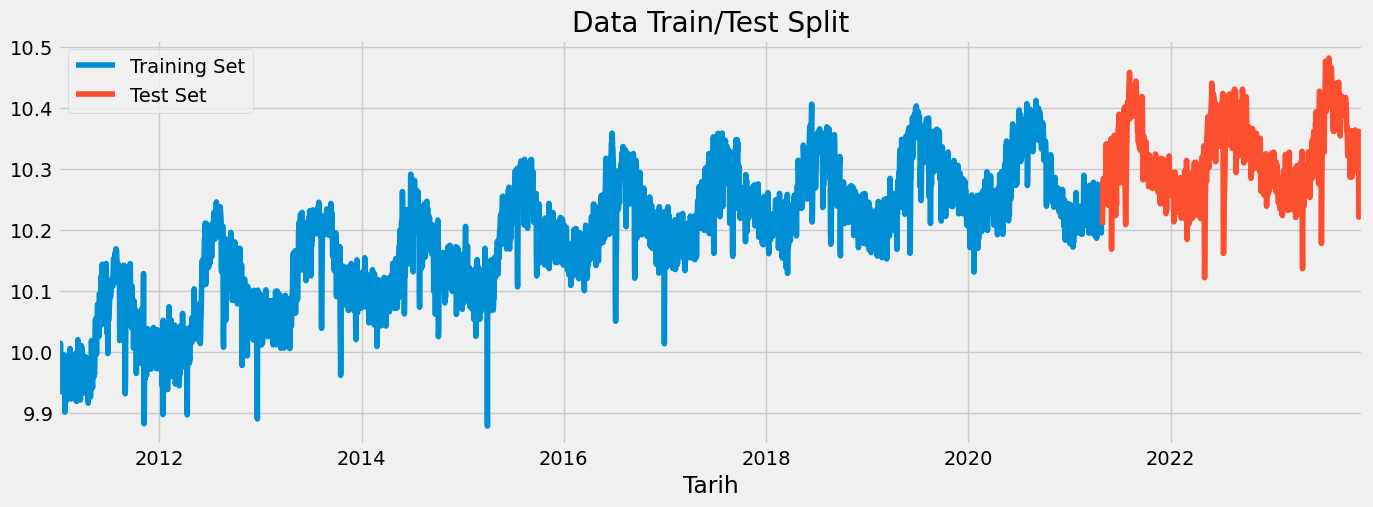

In [186]:
fig,ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax,label="training set",title="Data Train/Test Split")
test.plot(ax=ax,label="test set")
#ax.axvline("01-01-2022",color="black",ls='--')
ax.legend(['Training Set','Test Set'])
plt.show();

In [187]:
df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2023-11-18', '2023-11-19', '2023-11-20', '2023-11-21',
               '2023-11-22', '2023-11-23', '2023-11-24', '2023-11-25',
               '2023-11-26', '2023-11-27'],
              dtype='datetime64[ns]', name='Tarih', length=4714, freq=None)

In [188]:
df.index.dayofweek

Index([5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       ...
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
      dtype='int32', name='Tarih', length=4714)

In [189]:
df.index.dayofyear

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       322, 323, 324, 325, 326, 327, 328, 329, 330, 331],
      dtype='int32', name='Tarih', length=4714)

In [190]:
df.index.year

Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='Tarih', length=4714)

In [191]:
df.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
      dtype='int32', name='Tarih', length=4714)

In [192]:
df.index.quarter

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype='int32', name='Tarih', length=4714)

In [193]:
def create_features(df):
    df=df.copy()
    df['dayofweek']= df.index.dayofweek
    df['quarter']= df.index.quarter
    df['month']= df.index.month
    df['year']= df.index.year
    df['dayofyear']= df.index.dayofyear
    return df
df=create_features(df)

In [194]:
df

,İstanbul günlük tüketim(m³/gün),dayofweek,quarter,month,year,dayofyear
Tarih,,,,,,
2011-01-01,9.950419,5,1,1,2011,1
2011-01-02,10.005412,6,1,1,2011,2
2011-01-03,9.948652,0,1,1,2011,3
2011-01-04,9.950419,1,1,1,2011,4
2011-01-05,10.005412,2,1,1,2011,5
...,...,...,...,...,...,...
2023-11-23,10.309153,3,4,11,2023,327
2023-11-24,10.302666,4,4,11,2023,328
2023-11-25,10.315299,5,4,11,2023,329


In [195]:
train=create_features(train)
test=create_features(test)
FEATURES=['dayofweek','quarter','month','year','dayofyear']
TARGET='İstanbul günlük tüketim(m³/gün)'

In [196]:
train

,İstanbul günlük tüketim(m³/gün),dayofweek,quarter,month,year,dayofyear
Tarih,,,,,,
2011-01-01,9.950419,5,1,1,2011,1
2011-01-02,10.005412,6,1,1,2011,2
2011-01-03,9.948652,0,1,1,2011,3
2011-01-04,9.950419,1,1,1,2011,4
2011-01-05,10.005412,2,1,1,2011,5
...,...,...,...,...,...,...
2021-04-24,10.212772,5,2,4,2021,114
2021-04-25,10.195074,6,2,4,2021,115
2021-04-26,10.234911,0,2,4,2021,116


In [197]:
test

,İstanbul günlük tüketim(m³/gün),dayofweek,quarter,month,year,dayofyear
Tarih,,,,,,
2021-04-29,10.208211,3,2,4,2021,119
2021-04-30,10.233978,4,2,4,2021,120
2021-05-01,10.277806,5,2,5,2021,121
2021-05-02,10.281410,6,2,5,2021,122
2021-05-03,10.284113,0,2,5,2021,123
...,...,...,...,...,...,...
2023-11-23,10.309153,3,4,11,2023,327
2023-11-24,10.302666,4,4,11,2023,328
2023-11-25,10.315299,5,4,11,2023,329


In [198]:
X_train=train[FEATURES]
y_train=train[TARGET]

X_test=test[FEATURES]
y_test=test[TARGET]

In [199]:
X_train

,dayofweek,quarter,month,year,dayofyear
Tarih,,,,,
2011-01-01,5,1,1,2011,1
2011-01-02,6,1,1,2011,2
2011-01-03,0,1,1,2011,3
2011-01-04,1,1,1,2011,4
2011-01-05,2,1,1,2011,5
...,...,...,...,...,...
2021-04-24,5,2,4,2021,114
2021-04-25,6,2,4,2021,115
2021-04-26,0,2,4,2021,116


In [200]:
y_train

Tarih
2011-01-01     9.950419
2011-01-02    10.005412
2011-01-03     9.948652
2011-01-04     9.950419
2011-01-05    10.005412
                ...    
2021-04-24    10.212772
2021-04-25    10.195074
2021-04-26    10.234911
2021-04-27    10.217641
2021-04-28    10.207879
Name: İstanbul günlük tüketim(m³/gün), Length: 3771, dtype: float64

In [201]:
X_test

,dayofweek,quarter,month,year,dayofyear
Tarih,,,,,
2021-04-29,3,2,4,2021,119
2021-04-30,4,2,4,2021,120
2021-05-01,5,2,5,2021,121
2021-05-02,6,2,5,2021,122
2021-05-03,0,2,5,2021,123
...,...,...,...,...,...
2023-11-23,3,4,11,2023,327
2023-11-24,4,4,11,2023,328
2023-11-25,5,4,11,2023,329


In [202]:
y_test

Tarih
2021-04-29    10.208211
2021-04-30    10.233978
2021-05-01    10.277806
2021-05-02    10.281410
2021-05-03    10.284113
                ...    
2023-11-23    10.309153
2023-11-24    10.302666
2023-11-25    10.315299
2023-11-26    10.336438
2023-11-27    10.308419
Name: İstanbul günlük tüketim(m³/gün), Length: 943, dtype: float64

In [203]:
from sklearn.preprocessing import MinMaxScaler

In [204]:
# Veriyi normalize etme
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [205]:
reg = XGBRegressor(n_estimators=1000,early_stopping_rounds=50,learning_rate=0.01)
reg.fit(X_train,y_train,
       eval_set=[(X_train,y_train),(X_test,y_test)],
       verbose=True)

[0]	validation_0-rmse:0.20521	validation_1-rmse:0.34560
[1]	validation_0-rmse:0.20336	validation_1-rmse:0.34309
[2]	validation_0-rmse:0.20153	validation_1-rmse:0.34042
[3]	validation_0-rmse:0.19971	validation_1-rmse:0.33796
[4]	validation_0-rmse:0.19792	validation_1-rmse:0.33534
[5]	validation_0-rmse:0.19615	validation_1-rmse:0.33276
[6]	validation_0-rmse:0.19439	validation_1-rmse:0.33020
[7]	validation_0-rmse:0.19266	validation_1-rmse:0.32784
[8]	validation_0-rmse:0.19094	validation_1-rmse:0.32533
[9]	validation_0-rmse:0.18924	validation_1-rmse:0.32285
[10]	validation_0-rmse:0.18756	validation_1-rmse:0.32041
[11]	validation_0-rmse:0.18590	validation_1-rmse:0.31815
[12]	validation_0-rmse:0.18425	validation_1-rmse:0.31576
[13]	validation_0-rmse:0.18262	validation_1-rmse:0.31340
[14]	validation_0-rmse:0.18101	validation_1-rmse:0.31106
[15]	validation_0-rmse:0.17941	validation_1-rmse:0.30875
[16]	validation_0-rmse:0.17783	validation_1-rmse:0.30646
[17]	validation_0-rmse:0.17627	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [206]:
reg.feature_importances_

array([0.00953372, 0.3509247 , 0.0702836 , 0.48699957, 0.08225844],
      dtype=float32)

In [207]:
pred4=reg.predict(X_test)

In [208]:
# Tahminleri orijinal ölçeğe döndürme
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_orig = scaler_y.inverse_transform(pred4.reshape(-1, 1))

In [209]:
test['prediction']=reg.predict(X_test)

In [210]:
test

,İstanbul günlük tüketim(m³/gün),dayofweek,quarter,month,year,dayofyear,prediction
Tarih,,,,,,,
2021-04-29,10.208211,3,2,4,2021,119,0.689425
2021-04-30,10.233978,4,2,4,2021,120,0.688675
2021-05-01,10.277806,5,2,5,2021,121,0.688588
2021-05-02,10.281410,6,2,5,2021,122,0.692526
2021-05-03,10.284113,0,2,5,2021,123,0.692087
...,...,...,...,...,...,...,...
2023-11-23,10.309153,3,4,11,2023,327,0.694470
2023-11-24,10.302666,4,4,11,2023,328,0.693648
2023-11-25,10.315299,5,4,11,2023,329,0.702734


In [211]:
df.merge(test[['prediction']],how='left',left_index=True,right_index=True)

,İstanbul günlük tüketim(m³/gün),dayofweek,quarter,month,year,dayofyear,prediction
Tarih,,,,,,,
2011-01-01,9.950419,5,1,1,2011,1,NaN
2011-01-02,10.005412,6,1,1,2011,2,NaN
2011-01-03,9.948652,0,1,1,2011,3,NaN
2011-01-04,9.950419,1,1,1,2011,4,NaN
2011-01-05,10.005412,2,1,1,2011,5,NaN
...,...,...,...,...,...,...,...
2023-11-23,10.309153,3,4,11,2023,327,0.694470
2023-11-24,10.302666,4,4,11,2023,328,0.693648
2023-11-25,10.315299,5,4,11,2023,329,0.702734


In [212]:
df=df.merge(test[['prediction']],how='left',left_index=True,right_index=True)

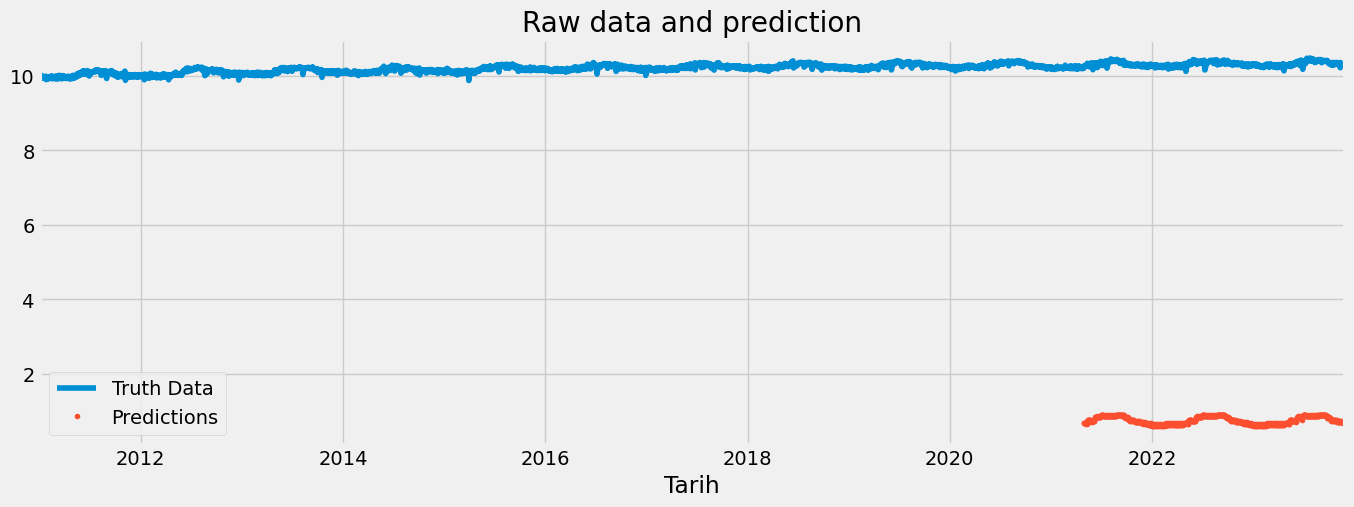

In [213]:
ax=df[['İstanbul günlük tüketim(m³/gün)']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax,style='.')
plt.legend(['Truth Data','Predictions'])
ax.set_title('Raw data and prediction')
plt.show()

In [214]:
mse = mean_squared_error(y_test_orig,y_pred_orig)
print("Mean Squared Error (MSE): {:.4f}".format(mse))

rmse=np.sqrt(mean_squared_error(y_test_orig,y_pred_orig))
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))

# Modelin tahminlerini kullanarak MAE hesaplayın
mae = mean_absolute_error(y_test_orig, y_pred_orig)

# MAE değerini yazdırın
print("Mean Absolute Error (MAE): {:.4f}".format(mae))

# Modelin tahminlerini ve gerçek değerleri kullanarak MAPE hesaplayın
mape = np.mean(np.abs((y_test_orig - y_pred_orig) / y_pred_orig))*100

# MAPE değerini yazdırın
print("Mean Absolute Percentage Error (MAPE): {:.4f}".format(mape))

Mean Squared Error (MSE): 0.0031
Root Mean Squared Error (RMSE): 0.0557
Mean Absolute Error (MAE): 0.0475
Mean Absolute Percentage Error (MAPE): 0.4616


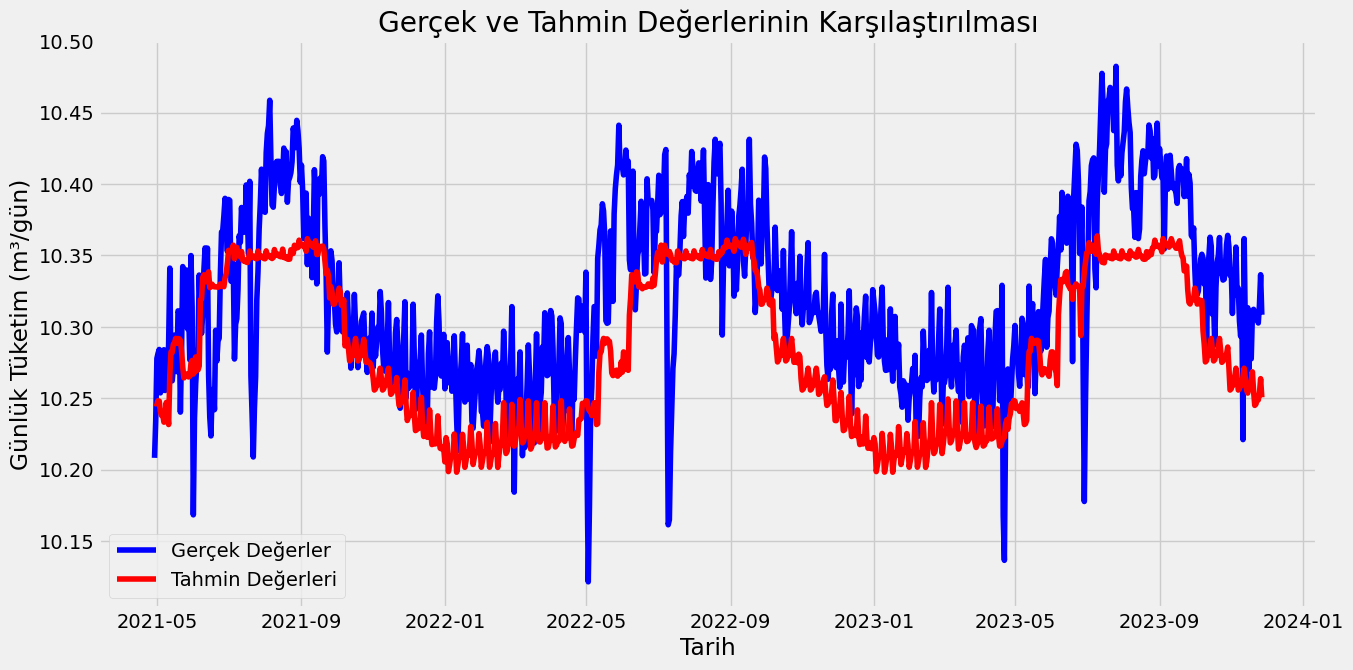

In [215]:
# Gerçek ve tahmin değerleri birleştirme
results = pd.DataFrame({'Tarih': test.index, 'Gerçek': y_test_orig.flatten(), 'Tahmin': y_pred_orig.flatten()})
results = results.set_index('Tarih')

# Görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Gerçek'], label='Gerçek Değerler', color='blue')
plt.plot(results.index, results['Tahmin'], label='Tahmin Değerleri', color='red')
plt.title('Gerçek ve Tahmin Değerlerinin Karşılaştırılması')
plt.xlabel('Tarih')
plt.ylabel('Günlük Tüketim (m³/gün)')
plt.legend()
plt.show()


In [216]:


from datetime import datetime, timedelta

# Gelecek 10 günün tarih aralığını belirleme
start_date = df.index[-1] + timedelta(days=1)
end_date = start_date + timedelta(days=9)
forecast_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Gelecek 10 gün için özellikler oluşturma
forecast_features = create_features(pd.DataFrame(index=forecast_dates))

# Özellikleri normalize etme
forecast_features_normalized = scaler_X.transform(forecast_features)

# Gelecek 10 günün su tüketimini tahmin etme
forecast_scaled = reg.predict(forecast_features_normalized)

# Tahminleri orijinal ölçeklere dönüştürme
forecast = scaler_y.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

# Tahminleri ve tarihleri birleştirme
forecast_results = pd.DataFrame({'Tarih': forecast_dates, 'Tahmin Edilen Su Tüketimi (m³/gün)': forecast})
forecast_results = forecast_results.set_index('Tarih')

print(forecast_results)

            Tahmin Edilen Su Tüketimi (m³/gün)
Tarih                                         
2023-11-28                           10.240772
2023-11-29                           10.234270
2023-11-30                           10.238669
2023-12-01                           10.240856
2023-12-02                           10.244966
2023-12-03                           10.256593
2023-12-04                           10.238070
2023-12-05                           10.227305
2023-12-06                           10.227857
2023-12-07                           10.232255


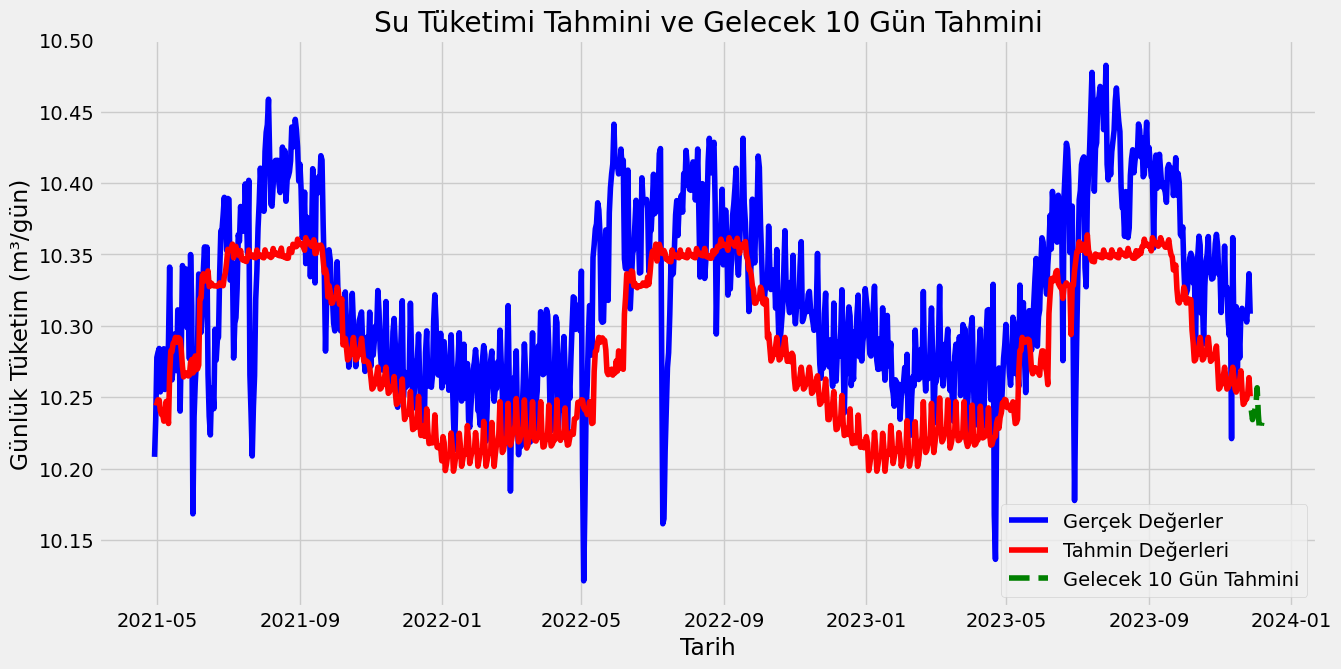

In [217]:
from datetime import datetime, timedelta

# Gelecek 10 günün tarih aralığını belirleme
start_date = df.index[-1] + timedelta(days=1)
end_date = start_date + timedelta(days=9)
forecast_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Gelecek 10 gün için özellikler oluşturma
forecast_features = create_features(pd.DataFrame(index=forecast_dates))

# Özellikleri normalize etme
forecast_features_normalized = scaler_X.transform(forecast_features)

# Gelecek 10 günün su tüketimini tahmin etme
forecast_scaled = reg.predict(forecast_features_normalized)

# Tahminleri orijinal ölçeklere dönüştürme
forecast = scaler_y.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

# Tahminleri ve tarihleri birleştirme
forecast_results = pd.DataFrame({'Tarih': forecast_dates, 'Tahmin Edilen Su Tüketimi (m³/gün)': forecast})
forecast_results = forecast_results.set_index('Tarih')

# Tahmin edilen su tüketimini görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Gerçek'], label='Gerçek Değerler', color='blue')
plt.plot(results.index, results['Tahmin'], label='Tahmin Değerleri', color='red')
plt.plot(forecast_results.index, forecast_results['Tahmin Edilen Su Tüketimi (m³/gün)'], label='Gelecek 10 Gün Tahmini', color='green', linestyle='--')
plt.title('Su Tüketimi Tahmini ve Gelecek 10 Gün Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Günlük Tüketim (m³/gün)')
plt.legend()
plt.show()


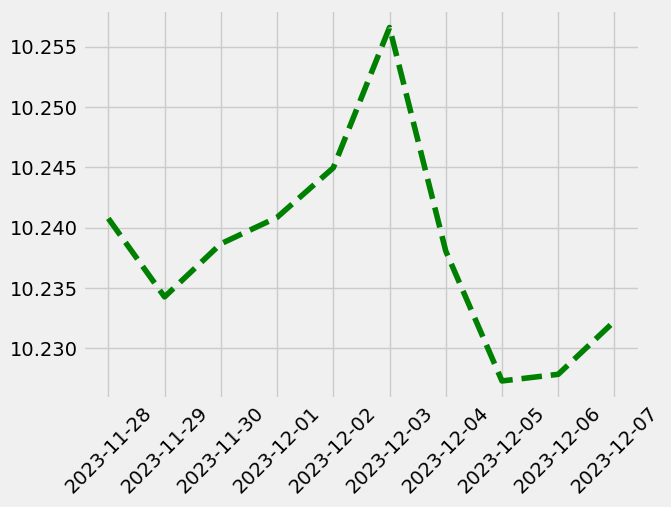

In [218]:
# Gelecek 10 günün tarihlerini daha iyi göstermek için x-eksenini ayarlama
plt.xticks(rotation=45)

# Tahmin edilen su tüketimini görselleştirme
plt.plot(forecast_results.index, forecast_results['Tahmin Edilen Su Tüketimi (m³/gün)'], label='Gelecek 10 Gün Tahmini', color='green', linestyle='--')


In [219]:
from datetime import datetime, timedelta

# Gelecek 365 günün tarih aralığını belirleme
start_date = df.index[-1] + timedelta(days=1)
end_date = start_date + timedelta(days=364)
forecast_dates_1_year = pd.date_range(start=start_date, end=end_date, freq='D')

# Gelecek 1 yıl için özellikler oluşturma
forecast_features_1_year = create_features(pd.DataFrame(index=forecast_dates_1_year))

# Özellikleri normalize etme
forecast_features_normalized_1_year = scaler_X.transform(forecast_features_1_year)

# Gelecek 1 yılın su tüketimini tahmin etme
forecast_scaled_1_year = reg.predict(forecast_features_normalized_1_year)

# Tahminleri orijinal ölçeklere dönüştürme
forecast_1_year = scaler_y.inverse_transform(forecast_scaled_1_year.reshape(-1, 1)).flatten()

# Tahminleri ve tarihleri birleştirme
forecast_results_1_year = pd.DataFrame({'Tarih': forecast_dates_1_year, 'Tahmin Edilen Su Tüketimi (m³/gün)': forecast_1_year})
forecast_results_1_year = forecast_results_1_year.set_index('Tarih')

forecast_results_1_year

,Tahmin Edilen Su Tüketimi (m³/gün)
Tarih,
2023-11-28,10.240772
2023-11-29,10.234270
2023-11-30,10.238669
2023-12-01,10.240856
2023-12-02,10.244966
...,...
2024-11-22,10.248772
2024-11-23,10.254364
2024-11-24,10.263664


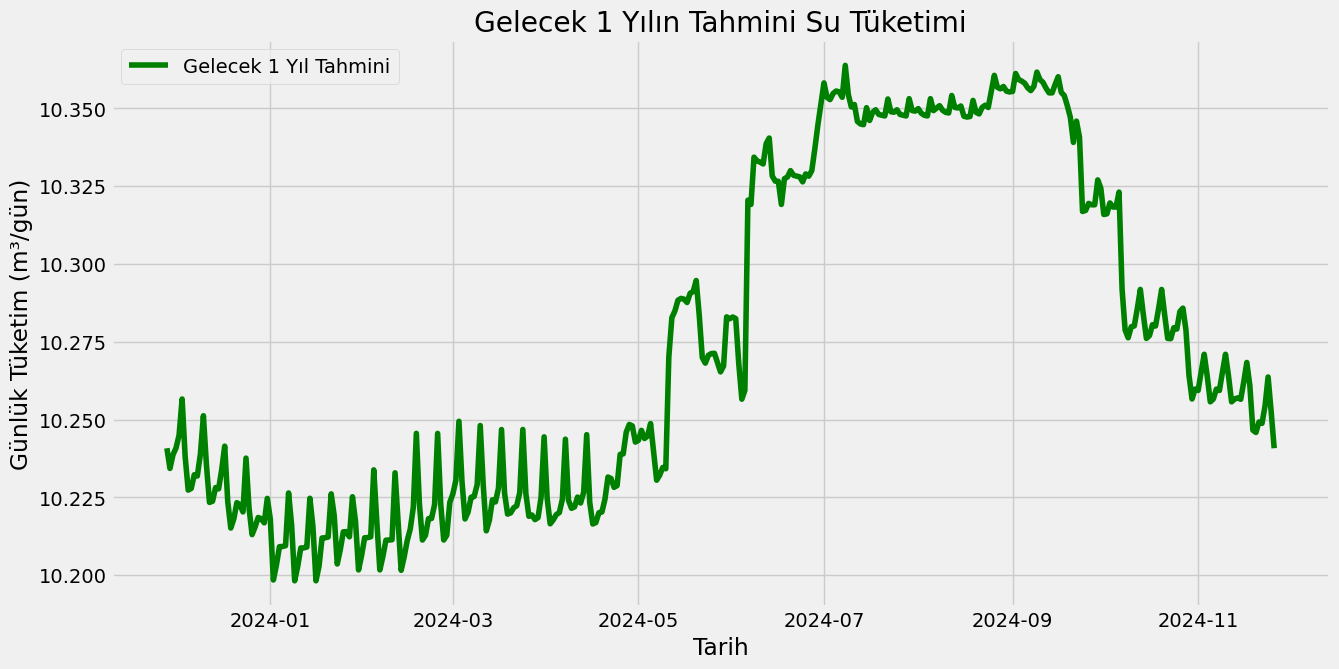

In [220]:
# Tahmin edilen su tüketimini görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(forecast_results_1_year.index, forecast_results_1_year['Tahmin Edilen Su Tüketimi (m³/gün)'], label='Gelecek 1 Yıl Tahmini', color='green')
plt.title('Gelecek 1 Yılın Tahmini Su Tüketimi')
plt.xlabel('Tarih')
plt.ylabel('Günlük Tüketim (m³/gün)')
plt.legend()
plt.show()


In [221]:
y_pred_orig

array([[10.246512 ],
       [10.24611  ],
       [10.246064 ],
       [10.24817  ],
       [10.247935 ],
       [10.240525 ],
       [10.237827 ],
       [10.238243 ],
       [10.233194 ],
       [10.238744 ],
       [10.247002 ],
       [10.239793 ],
       [10.231554 ],
       [10.266058 ],
       [10.28242  ],
       [10.281949 ],
       [10.287738 ],
       [10.28869  ],
       [10.291861 ],
       [10.288359 ],
       [10.29176  ],
       [10.291532 ],
       [10.29045  ],
       [10.283003 ],
       [10.271618 ],
       [10.264195 ],
       [10.265814 ],
       [10.266384 ],
       [10.267084 ],
       [10.264865 ],
       [10.265437 ],
       [10.274443 ],
       [10.276374 ],
       [10.2669735],
       [10.268251 ],
       [10.278849 ],
       [10.269431 ],
       [10.269857 ],
       [10.272542 ],
       [10.31876  ],
       [10.319477 ],
       [10.334491 ],
       [10.336389 ],
       [10.3315525],
       [10.3315525],
       [10.335315 ],
       [10.33842  ],
       [10.32